In [2]:
# We import all the libraries that we need in our analysis and we will import others as we need them.
import pandas as pd
import math
import numpy as np
import scipy.stats as stats
from scipy.stats import binom
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings('ignore')

# Tasks

## Load the dataset Q1.csv. It contains the exam scores (in percentages) of a sample of 50 students from a Dublin secondary school.

### a. Find and comment on important summary statistics and produce an appropriate plot to summarise the dataset.

In [3]:
# Importing the dataset.

df_q1 = pd.read_csv('Q1.csv')

In [4]:
df_q1.head()

,exam_score
0,74.54
1,66.20
2,86.75
3,70.87
4,80.43


The ".describe()" syntax gives us a general idea of student performance on the test, such as the mean, median, spread of the data, and percentiles.

**count**: indicates the number of values in the "exam_score" column, in this case, 50 students.

**mean**: indicates the mean of the values in the "exam_score" column, that is, the average of the grades of the 50 students. In this case, the average or mean is 68.74%.

**std**: indicates the standard deviation of the values in the "exam_score" column, which measures the variability of the data in relation to the mean. A more significant standard deviation indicates that the data is more spread out around the mean. In this case, the standard deviation is 9.750143, which suggests some variability in student scores.

**min**: indicates the minimum value of the "exam_score" column, the lowest score. In this case, the minimum rating is 48.73%.

**25%**: indicates the 25th percentile of the "exam_score" column, that is, the value below which 25% of the data lies. In this case, the 25th percentile is 62.04%, which suggests that at least 25% of the students scored below 62.04%.

**50%**: Indicates the 50th percentile of the "exam_score" column, also known as the median, that is, the value that is right in the middle of all the values. In this case, the median is 68.39%.

**75%**: indicates the 75th percentile of the "exam_score" column, that is, the value below which 75% of the data lies. In this case, the 75th percentile is 74.63%, which suggests that at least 25% of the students scored higher than 74.63%.

**max**: indicates the maximum value of the "exam_score" column, the highest score. In this case, the highest score is 87.36%.

In [5]:
df_q1.describe()

,exam_score
count,50.000000
mean,68.735600
std,9.750143
min,48.730000
25%,62.040000
50%,68.390000
75%,74.630000
max,87.360000


**Histogram**

- The histogram shows us the distribution of test scores in the percentage of a sample of 50 students from a secondary school in Dublin.

- The horizontal axis represents the values of the test scores in percentage, while the vertical axis represents the frequency with which these values occur in the sample of students. The graph shows us how the scores are distributed in the sample, which can give us an idea of how many students scored high, how many scored low, and how scores are grouped overall.

**Boxplot**

- The Boxplot diagram is a graph that represents the distribution of data through five statistics:

    a.- Minimum = (48.73)

    b.- First Quartile (Q1) = (62.04)

    c.- Median = (68.39)

    d.- Third Quartile (Q3) = (74.63)

    e.- Maximum = (87.36)
    
- The box in the centre of the graph represents the interquartile range (IQR), which is the distance between Q1 and Q3.

     .-Where: IQR = Q3 - Q1 = 74.63 - 62.04 = 12.59


- The vertical lines extend from the box to the minimum and maximum value, excluding outliers that are shown as points outside the vertical lines.

- This graph is useful to visualize the distribution of data, detect outliers and compare distributions between different groups or categories. In this case, the distribution of test scores for a sample of 50 students from a Dublin secondary school is plotted. Where we can see the spread of the data, the position of the median and quartiles, and if there are any outliers. We can also compare the distribution of student scores with other samples or groups.

**Density chart**

- The density plot is useful to determine the shape of the data distribution, such as whether the data is skewed to the left, skewed to the right, or symmetric. It is also useful for identifying the presence of outliers or spikes in the data.

- In this case, the distribution seems to be unimodal and symmetric around the mean of 68.7356. The density curve extends from the low of 48.73 to the high of 87.36 and appears to be quite smooth, suggesting that the distribution may be continuous. The median value (50% of the data) is 68.39, which is very close to the mean, indicating that the distribution is approximately normal or Gaussian. Also, the fact that the curve is relatively tall and narrow suggests that the data has a low range or spread, which is in line with the standard deviation of 9.75.

**Density charts with 25th, 50th and 75th percentiles**

- The graph shows the densities of the distribution of the test scores, as well as the values of percentiles 25, 50 and 75, which correspond to 62.04, 68.39 and 74.63 respectively.

- The vertical line in each graph shows the location of the corresponding percentile. Where:
    
     a.- The Percentile (25) indicates that at least 25% of the students obtained a grade below 62.04%.
        
     b.- The Percentile (50) or also known as the median indicates the value that is right in the middle of all the values in this case of 68.39%.
        
     c.- The Percentile (75) indicates that at least 25% of the students obtained a grade higher than 74.63%.

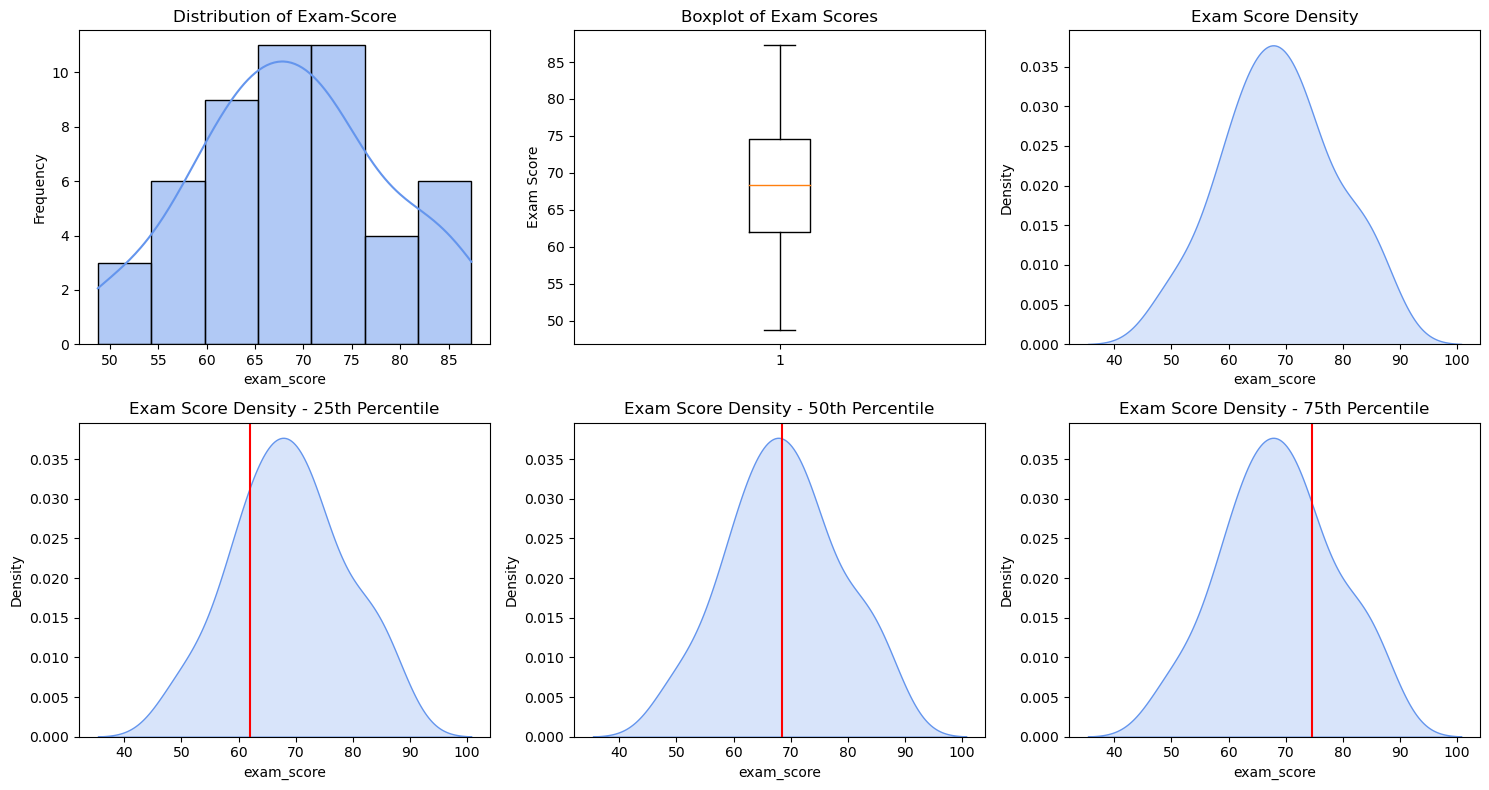

In [6]:
# Grafic

fig, axs = plt.subplots(2, 3, figsize=(15, 8))

# Histogram
sns.histplot(data=df_q1, x="exam_score", kde=True, ax=axs.flat[0], color='cornflowerblue')
axs.flat[0].set_xlabel('exam_score')
axs.flat[0].set_ylabel('Frequency')
axs.flat[0].set_title('Distribution of Exam-Score')

# Boxplot
axs.flat[1].boxplot(df_q1['exam_score'])
axs.flat[1].set_title('Boxplot of Exam Scores')
axs.flat[1].set_ylabel('Exam Score')

# Density chart
sns.kdeplot(df_q1['exam_score'], shade=True, color='cornflowerblue', ax=axs.flat[2])
axs.flat[2].set_title('Exam Score Density')

# Density charts with 25th, 50th and 75th percentiles
for i, percentile in enumerate([25, 50, 75]):
    sns.kdeplot(df_q1['exam_score'], shade=True, color='cornflowerblue', ax=axs.flat[i+3])
    axs.flat[i+3].axvline(x=np.percentile(df_q1['exam_score'], percentile), color='red')
    axs.flat[i+3].set_title(f'Exam Score Density - {percentile}th Percentile')

plt.tight_layout()
plt.show()

### b. One of the teachers is concerned about the performance of the students in the school. She suspects that their performance may be below the reported national average of 70%. Does the data show that her concerns are justified? Use a significance level of alpha = 0.05.

One of the teachers is concerned about the performance of the students in school. She suspects that her performance may be below the reported national average of 70%. Does the data show that her concerns are justified? Use a significance level of alpha = 0.05.


**H0:** The null hypothesis is that the average or mean of the student's scores is greater than 70%

**H1:** The alternative hypothesis is that the mean or mean is less than 70%.


**If the p-value < α, we reject H0 in favor of the alternative hypothesis, H1.**

**If the p-value > α, then we fail to reject H1. We have not found enough evidence in favour of H1.**


Since p-value > α, there is not enough evidence to affirm that the average of the student's scores is less than 70%. Therefore, the teacher's concerns may not be justified.

**Observation:**

When we perform a hypothesis test with a one-sided alternative hypothesis (as in this case where H1 is that the mean is less than 70%), the rejection region is at one of the two extremes of the distribution (in this case, the lower end).

To calculate the "p" value, we calculate the probability of observing a "t" value in the direction of the alternative hypothesis (H1) under the null hypothesis (H0).

However, when dealing with a one-sided hypothesis, this probability is divided into two parts, since the rejection region is located at one of the two extremes of the distribution (in this case, the lower extreme). Therefore, the "p" value obtained by the hypothesis test is divided by 2 to obtain the probability of observing a "t" value in the direction of the alternative hypothesis (H1), that is, "t" values smaller than the observed value under the null hypothesis (H0).

In [7]:
# H0: the average or mean of the grades is greater than 70% Null Hypothesis
# H1: the average or mean of the grades is less than 70% Alternative Hypothesis
mu = 70
alpha = 0.05
t_stat, p_val = stats.ttest_1samp(df_q1['exam_score'], mu)

# comparison of the p-value with the alpha level of significance
if p_val/2 < alpha and t_stat < 0:
    print("The null hypothesis is rejected, there is statistical evidence to conclude that the student's grades are lower than the national average..")
else:
    print("The null hypothesis is not rejected, there is not enough statistical evidence to conclude that the student's grades are lower than the national average..")
    
print('\nt-statistic:', t_stat)
print('p-value:', p_val/2)

The null hypothesis is not rejected, there is not enough statistical evidence to conclude that the student's grades are lower than the national average..

t-statistic: -0.9169771399834613
p-value: 0.18182298516031403


### c. Produce and comment on an appropriate plot to illustrate your findings

The following graph shows us the "t" distribution of our data and the critical region shaded in red, where the "t" values that fall in that region are those that provide sufficient evidence to reject the null hypothesis (H0).

In this case, the value of "t-statistic" is outside the critical region, which indicates that there is not enough statistical evidence to reject the null hypothesis (H0).

Specifically, the black dashed vertical line represents the t-statistic value (-0.917), and the red-shaded region represents the critical region where t-values falling in this region would be extreme enough to reject the hypothesis. null (H0).

As the value of "t" is outside the critical region, the null hypothesis (H0) cannot be rejected and it is concluded that there is not enough statistical evidence to conclude that the student's grades are lower than the national average.

The value of p/2 (0.182) refers to the level of significance and is compared with alpha (0.05) to determine whether or not to reject the null hypothesis (H0).

Since p/2 is not less than alpha, the null hypothesis (H0) is not rejected.

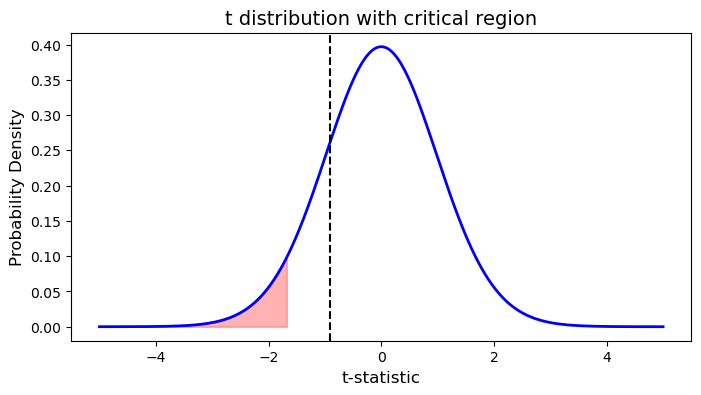

In [8]:
# Grafic
df = len(df_q1['exam_score']) - 1

x = np.linspace(-5, 5, 1000)
t = stats.t.pdf(x, df)

t_critical = stats.t.ppf(alpha, df)

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(x, t, 'b-', linewidth=2)

ax.fill_between(x[x<=t_critical], 0, t[x<=t_critical], alpha=0.3, color='red')

ax.axvline(t_stat, color='black', linestyle='--')

ax.set_title('t distribution with critical region', fontsize=14)
ax.set_xlabel('t-statistic', fontsize=12)
ax.set_ylabel('Probability Density', fontsize=12)

plt.show()

## Load the diamonds dataset, and print the first 5 rows. The color variable refers to the colour of the diamond, with categories from “D” to “J”. Colourless diamonds are considered better than diamonds with a yellow tint. Diamonds from “D” to “F” are considered colourless, and diamonds from colour “G” to “J” are not considered colourless (that is, they have a very faint colour).

### a. Create a new binary variable in the dataframe called “colourless” which records 1 in rows with colourless diamonds and 0 otherwise.

In [9]:
# Importing the dataset.

df_diamonds = pd.read_csv('diamonds.csv')

In [10]:
df_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [11]:
df_diamonds['colourless'] = df_diamonds['color'].apply(lambda x: 1 if x in ['D', 'E', 'F'] else 0)

In [12]:
df_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,colourless
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0


### b. Perform an appropriate hypothesis test to determine whether there is any association between the clarity of a diamond and whether it is colourless or not. Use a significance level of alpha = 0.01.

The interpretation of the results is as follows:

The null hypothesis is rejected indicating that there is sufficient statistical evidence to conclude that there is an association between the clarity of diamonds and whether or not they are colourless. In other words, the clarity of diamonds is related to their colourlessness.

The contingency table shows the distribution of the observed data, where the number of diamonds classified according to their clarity and whether they are colourless or not are presented. For example, there are 454 diamonds classified as "I1" that are not colourless and 287 that are colourless.

The value of the chi-square statistic is 486.47305941485223. This value indicates the magnitude of the observed difference between the observed frequencies and the expected frequencies under the null hypothesis. A larger chi-square value indicates a larger discrepancy between the observed and expected data under the null hypothesis.

The p-value is 6.481587124454715e-101, which is extremely small. This indicates that the probability of obtaining such a large difference between the observed and expected frequencies under the null hypothesis is very low, providing strong evidence against the null hypothesis. In other words, the association between the clarity and colouration of diamonds is highly unlikely to be random.

The number of degrees of freedom is 7, which is calculated as (number of rows - 1) * (number of columns - 1). The degrees of freedom represent the amount of information available to estimate the expected frequencies.

The expected frequency matrix shows the frequencies that would be expected if there was no association between the clarity and colourlessness of diamonds. These frequencies are calculated under the null hypothesis and are used to compare them with the observed frequencies.

In summary, the results indicate that there is a significant association between the clarity of diamonds and whether they are colourless or not. The difference between the observed and expected frequencies cannot be attributed to chance, suggesting that clarity is related to the colouration of the diamonds.

In [13]:
# Relevant data from the DataFrame
df_diamonds1 = pd.DataFrame({
    'clarity': df_diamonds['clarity'],
    'colourless': df_diamonds['colourless']})

# Contingency table
contingency_table = pd.crosstab(df_diamonds1['clarity'], df_diamonds1['colourless'])

# Chi-square test
chi2, p_val, dof, expected = chi2_contingency(contingency_table)

# Comparison of p-value with the alpha significance level
alpha = 0.01
if p_val < alpha:
    print("The null hypothesis is rejected, there is statistical evidence to conclude that there is an association between clarity and whether it is colourless or not.")
else:
    print("\nThe null hypothesis is not rejected, there is not enough statistical evidence to conclude that there is an association between clarity and whether it is colourless or not.")
    

print(contingency_table)
print('\nChi-square statistic:', chi2)
print('p-value:', p_val)
print('Degrees of freedom:', dof)
print('Expected frequencies:', expected)

The null hypothesis is rejected, there is statistical evidence to conclude that there is an association between clarity and whether it is colourless or not.
colourless     0     1
clarity               
I1           454   287
IF          1174   616
SI1         6425  6640
SI2         4502  4692
VS1         4821  3350
VS2         5890  6368
VVS1        2013  1642
VVS2        2547  2519

Chi-square statistic: 486.47305941485223
p-value: 6.481587124454715e-101
Degrees of freedom: 7
Expected frequencies: [[ 382.2592881   358.7407119 ]
 [ 923.40637746  866.59362254]
 [6739.83481646 6325.16518354]
 [4742.90404153 4451.09595847]
 [4215.16955877 3955.83044123]
 [6323.52814238 5934.47185762]
 [1885.50296626 1769.49703374]
 [2613.39480905 2452.60519095]]


### c. Produce and comment on an appropriate plot to illustrate your findings.

The graph shows us the ratio of colourless diamonds to colourless (coloured) diamonds based on the clarity of the diamonds.

The x-axis represents the different clarity categories of diamonds, which are the labels on the x-axis.

The y-axis represents the number of diamonds.

There are two bars for each clarity category: one for colourless diamonds (labelled "Colourless") and one for colourless diamonds (labelled "Non-Colourless").

The height of each bar represents the number of diamonds in each category.

The bottom bar represents the colourless diamonds and the top bar shows the colourless diamonds stacked on top of the colourless diamonds.

We use this chart to visually compare the proportion of colourless to non-colourless diamonds in each clarity category. 

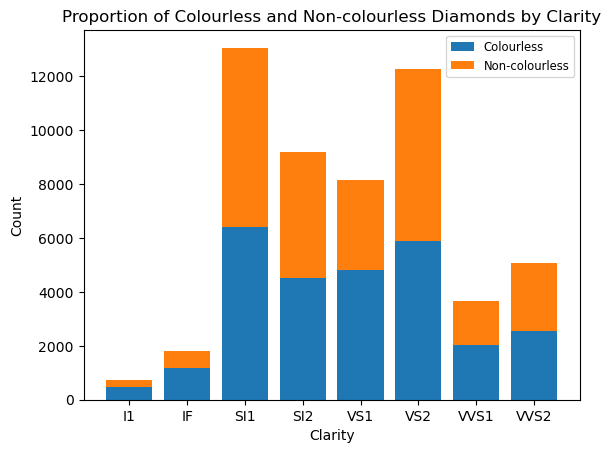

In [14]:
# Grafic
categories = contingency_table.index

observed = contingency_table.values

fig, ax = plt.subplots()
ax.bar(categories, observed[:, 0], label='Colourless')
ax.bar(categories, observed[:, 1], bottom=observed[:, 0], label='Non-colourless')

ax.set_title('Proportion of Colourless and Non-colourless Diamonds by Clarity')
ax.set_xlabel('Clarity')
ax.set_ylabel('Count')

ax.legend(fontsize='small')

plt.show()

### d. Find and interpret 90% confidence intervals for both the mean price of colourless diamonds and the mean price of non colourless diamonds.

The 90% confidence intervals provide an estimated range in which the median value of the prices for colourless and non-colourless diamonds is expected to lie. Where:

- 90% confidence interval for colourless diamonds: (3301.8575158790077, 3373.6612862960706) This means that, at the 90% confidence level, the median price value for colourless diamonds is estimated to be in the range between 3,301.86 and 3,373.66 units. Approximately 90% of the estimates of median price values are expected to fall within this range.


- 90% confidence interval for non-colourless diamonds: (4448.778068284649, 4533.682076903305) Similarly, with a 90% confidence level, the median price value for non-colourless diamonds is estimated to be in the range between 4448.78 and 4533.68 units. This range provides an estimate of the range in which the median value of prices for non-colourless diamonds is expected to fall in approximately 90% of cases.

In [15]:
# Colourless and non-colourless diamond prices
prices_colourless = df_diamonds[df_diamonds['colourless'] == 1]['price']
prices_non_colourless = df_diamonds[df_diamonds['colourless'] == 0]['price']


mean_colourless = np.mean(prices_colourless)
std_colourless = np.std(prices_colourless, ddof=1)  


mean_non_colourless = np.mean(prices_non_colourless)
std_non_colourless = np.std(prices_non_colourless, ddof=1)


standard_error_colourless = std_colourless / np.sqrt(len(prices_colourless))
standard_error_non_colourless = std_non_colourless / np.sqrt(len(prices_non_colourless))


interval_colourless = stats.t.interval(0.9, len(prices_colourless)-1, loc=mean_colourless, scale=standard_error_colourless)
interval_non_colourless = stats.t.interval(0.9, len(prices_non_colourless)-1, loc=mean_non_colourless, scale=standard_error_non_colourless)


print("90% confidence interval for colourless diamonds:", interval_colourless)
print("\n90% confidence interval for non-colourless diamonds:", interval_non_colourless)

90% confidence interval for colourless diamonds: (3301.8575158790077, 3373.6612862960706)

90% confidence interval for non-colourless diamonds: (4448.778068284649, 4533.682076903305)


## Load the PlantGrowth dataset from the pydataset library. It contains the results of a small study comparing the yields of plants obtained under a control and under two different treatment conditions.

In [16]:
# Import the dataset:
from pydataset import data

df_plantgrowth = data('PlantGrowth')

df_plantgrowth.head()

,weight,group
1,4.17,ctrl
2,5.58,ctrl
3,5.18,ctrl
4,6.11,ctrl
5,4.50,ctrl


### a. Find and comment on important summary statistics by treatment and produce an appropriate plot to summarise the dataset.

**For the 'ctrl' group**:

- There are a total of 10 observations in the 'ctrl' group.

- The average weight is 5,032 units, which indicates the average value of the weight in this group.

- The standard deviation of the weight is 0.583091, which shows the variability of the weight values within the group.

- The minimum weight observed in this group is 4.17 units.

- The first quartile (25%) is 4.55 units, which means that 25% of the data in the 'ctrl' group weighs less than 4.55 units.

- The median (50%) is 5,155 units, indicating the value that divides the 'ctrl' group into two equal parts in terms of weight.

- The third quartile (75%) is 5.2925 units, which means that 75% of the data in the 'ctrl' group weighs less than 5.2925 units.

- The maximum weight observed in this group is 6.11 units.

**For group 'trt1'**:

- There are a total of 10 observations in the 'trt1' group.

- The average weight is 4,661 units, which indicates the average value of the weight in this group.

- The standard deviation of the weight is 0.793676, which shows the variability of the weight values within the group.

- The minimum weight observed in this group is 3.59 units.

- The first quartile (25%) is 4.2075 units.

- The median (50%) is 4.55 units.

- The third quartile (75%) is 4.87 units.

- The maximum weight observed in this group is 6.03 units.

**For group 'trt2'**:

- There are a total of 10 observations in the 'trt2' group.

- The average weight is 5,526 units, which indicates the average value of the weight in this group.

- The standard deviation of the weight is 0.442573, which shows the variability of the weight values within the group.

- The minimum weight observed in this group is 4.92 units.

- The first quartile (25%) is 5.2675 units.

- The median (50%) is 5,435 units.

- The third quartile (75%) is 5,735 units.

- The maximum weight observed in this group is 6.31 units.

In [17]:
# DataFrame
df_plantgrowth = pd.DataFrame({
    'weight': [4.17, 5.58, 5.18, 6.11, 4.50, 4.61, 5.17, 4.53, 5.33, 5.14,
               4.81, 4.17, 4.41, 3.59, 5.87, 3.83, 6.03, 4.89, 4.32, 4.69,
               6.31, 5.12, 5.54, 5.50, 5.37, 5.29, 4.92, 6.15, 5.80, 5.26],
    'group': ['ctrl', 'ctrl', 'ctrl', 'ctrl', 'ctrl', 'ctrl', 'ctrl', 'ctrl', 'ctrl', 'ctrl',
              'trt1', 'trt1', 'trt1', 'trt1', 'trt1', 'trt1', 'trt1', 'trt1', 'trt1', 'trt1',
              'trt2', 'trt2', 'trt2', 'trt2', 'trt2', 'trt2', 'trt2', 'trt2', 'trt2', 'trt2']
})

summary_stats = df_plantgrowth.groupby('group')['weight'].describe()

for group, stats in summary_stats.groupby('group'):
    print(f"\nSummary statistics for group '{group}':")
    print(stats)
    print()


Summary statistics for group 'ctrl':
       count   mean       std   min   25%    50%     75%   max
group                                                         
ctrl    10.0  5.032  0.583091  4.17  4.55  5.155  5.2925  6.11


Summary statistics for group 'trt1':
       count   mean       std   min     25%   50%   75%   max
group                                                        
trt1    10.0  4.661  0.793676  3.59  4.2075  4.55  4.87  6.03


Summary statistics for group 'trt2':
       count   mean       std   min     25%    50%    75%   max
group                                                          
trt2    10.0  5.526  0.442573  4.92  5.2675  5.435  5.735  6.31



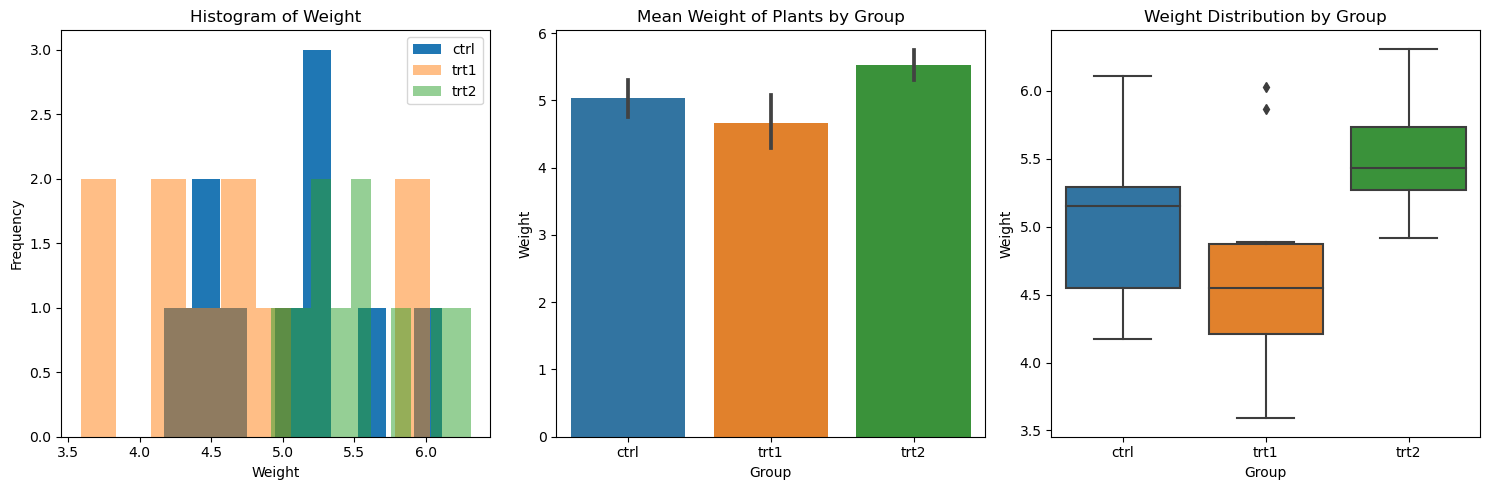

In [18]:
# Grafic
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Histogram
axes[0].hist(df_plantgrowth[df_plantgrowth['group'] == 'ctrl']['weight'], bins=10, label='ctrl')
axes[0].hist(df_plantgrowth[df_plantgrowth['group'] == 'trt1']['weight'], bins=10, label='trt1', alpha=0.5)
axes[0].hist(df_plantgrowth[df_plantgrowth['group'] == 'trt2']['weight'], bins=10, label='trt2', alpha=0.5)
axes[0].set_xlabel('Weight')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Weight')
axes[0].legend()

# Barplot
sns.barplot(data=df_plantgrowth, x='group', y='weight', ci=90, ax=axes[1])
axes[1].set_xlabel('Group')
axes[1].set_ylabel('Weight')
axes[1].set_title('Mean Weight of Plants by Group')

# Boxplot
sns.boxplot(data=df_plantgrowth, x='group', y='weight', ax=axes[2])
axes[2].set_xlabel('Group')
axes[2].set_ylabel('Weight')
axes[2].set_title('Weight Distribution by Group')

plt.tight_layout()
plt.show()

### b. Conduct an appropriate hypothesis test to see if there is evidence of a difference between the three means (that is, the control and the two treatments). Use a significance level of alpha = 0.05.

In [19]:
# ANOVA
from scipy.stats import f_oneway

ctrl_weights = df_plantgrowth[df_plantgrowth['group'] == 'ctrl']['weight']
trt1_weights = df_plantgrowth[df_plantgrowth['group'] == 'trt1']['weight']
trt2_weights = df_plantgrowth[df_plantgrowth['group'] == 'trt2']['weight']

f_stat, p_value = f_oneway(ctrl_weights, trt1_weights, trt2_weights)

alpha = 0.05
if p_value < alpha:
    print("The null hypothesis is rejected, there is evidence of a significant difference between the means.")
else:
    print("The null hypothesis is not rejected, there is insufficient evidence of a significant difference between the means.")

print("F-Statistical:", f_stat)
print("p-value:", p_value)

The null hypothesis is rejected, there is evidence of a significant difference between the means.
F-Statistical: 4.846087862380136
p-value: 0.0159099583256229


### c. If there is evidence of a difference between the three means, find and comment on where this difference may be.

Results Table:

**group1 and group2**: They represent the groups that we are comparing.

**Meandiff**: It is the average difference between the means of the groups. For example, for the comparison between ctrl and trt1, the average difference is -0.371.

**p-adj**: It is the p-value adjusted to control the type I error. It indicates the probability of obtaining a difference as large or more extreme than that observed if the null hypothesis is true. For example, for the comparison between trt1 and trt2, the adjusted p-value is 0.012.

**lower and upper**: represent the lower and upper limits of the confidence interval for the difference in means.

**rejection**: Indicates whether or not the null hypothesis is rejected. True means rejected, which implies that there is a significant difference between the group means. False means not rejected, which implies that there is not enough evidence to say that there is a significant difference.

Results:

- No significant differences were found between the 'ctrl' group and the 'trt1' group (p-adj = 0.3909 > 0.05).

- No significant differences were found between the 'ctrl' group and the 'trt2' group (p-adj = 0.198 > 0.05).

- A significant difference was found between the 'trt1' group and the 'trt2' group (p-adj = 0.012 < 0.05).

In summary, the results indicate that there is a significant difference in the means between the 'trt1' group and the 'trt2' group, but there are no significant differences between the 'ctrl' group and the other two groups ('trt1' and 'trt2').

In [20]:
# Tukey's test
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_results = pairwise_tukeyhsd(df_plantgrowth['weight'], df_plantgrowth['group'])

print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  ctrl   trt1   -0.371 0.3909 -1.0622 0.3202  False
  ctrl   trt2    0.494  0.198 -0.1972 1.1852  False
  trt1   trt2    0.865  0.012  0.1738 1.5562   True
---------------------------------------------------


## Load the trees dataset from the pydataset library. It contains measurements of the diameter, height and volume of timber in 31 felled black cherry trees. Note that the diameter (in inches) is labelled girth in the dataset. It is measured at 4 foot 6 inches above the ground.

In [21]:
# Import the dataset:
from pydataset import data

df_trees = data('trees')

df_trees.head()

,Girth,Height,Volume
1,8.3,70,10.3
2,8.6,65,10.3
3,8.8,63,10.2
4,10.5,72,16.4
5,10.7,81,18.8


### a. Perform a correlation analysis between all numerical variables. Include and comment on the results of hypothesis tests for the population correlation coefficients between all three pairs of variables (you can use the pearsonr function from the scipy.stats library).

The Pearson correlation coefficient is a measure of linear dependence between two quantitative random variables.
Unlike covariance, Pearson's correlation is independent of the scale of measurement of the variables.

The Pearson correlation coefficient measures the degree of correlation (and the direction of that correlation - whether it is positive or negative) between two metric scale variables (interval or ratio/proportion).
The coefficient can take values between -1 and 1. 

A value close to 1 indicates a strong positive linear correlation, while a value close to -1 indicates a strong negative linear correlation. A value close to 0 indicates that there is no linear correlation between the two variables.

Reference: https://www.wallstreetmojo.com/pearson-correlation-coefficient/


Regarding the results, the following is observed:

- Between "Girth" and "Height" a moderate positive correlation was found (correlation coefficient = 0.5193). The p-value associated with this coefficient is 0.0028, which indicates that the probability of obtaining a correlation coefficient equal to or more extreme than that observed under the null hypothesis of no correlation is very low. Therefore, there is statistical evidence of a significant correlation between these two variables.


- Between "Girth" and "Volume" a strong positive correlation was found (correlation coefficient = 0.9671). The p-value associated with this coefficient is 0.0000, indicating strong evidence of a significant correlation between these two variables.


- Between "Height" and "Volume" a moderate positive correlation was found (correlation coefficient = 0.5982). The p-value associated with this coefficient is 0.0004, which indicates significant statistical evidence of a correlation between these two variables.


In summary, the results indicate that there is a significant correlation between the variables "Girth" and "Height", "Girth" and "Volume", and "Height" and "Volume". These correlations suggest that there is a relationship between these variables and that changes in one variable are associated with changes in the other variable. It is important to consider these correlations when analyzing and modelling the data, as they may have implications for the interpretation and prediction of the results.


In [22]:
# DataFrame
import scipy.stats as stats
import pandas as pd

data = {'Girth': [8.3, 8.6, 8.8, 10.5, 10.7, 10.8, 11.0, 11.0, 11.1, 11.2, 11.3, 11.4, 11.4, 
                  11.7, 12.0, 12.9, 12.9, 13.3, 13.7, 13.8, 14.0, 14.2, 14.5, 16.0, 16.3, 17.3, 
                  17.5, 17.9, 18.0, 18.0, 20.6],
        'Height': [70, 65, 63, 72, 81, 83, 66, 75, 80, 75, 79, 76, 76, 69, 75, 74, 85, 86, 71, 
                   64, 78, 80, 74, 72, 77, 81, 82, 80, 80, 80, 87],
        'Volume': [10.3, 10.3, 10.2, 16.4, 18.8, 19.7, 15.6, 18.2, 22.6, 19.9, 24.2, 21.0, 21.4, 
                   21.3, 19.1, 22.2, 33.8, 27.4, 25.7, 24.9, 34.5, 31.7, 36.3, 38.3, 42.6, 55.4, 
                   55.7, 58.3, 51.5, 51.0, 77.0]}

df_trees = pd.DataFrame(data)

correlation_matrix = df_trees.corr()

print(correlation_matrix)

correlation_coefficients = ['Girth', 'Height', 'Volume']
alpha = 0.05

for i in range(len(correlation_coefficients)):
    for j in range(i+1, len(correlation_coefficients)):
        variable1 = correlation_coefficients[i]
        variable2 = correlation_coefficients[j]
        r, p_value = stats.pearsonr(df_trees[variable1], df_trees[variable2])
        if p_value < alpha:
            print(f"\nThere is evidence of a correlation between {variable1} y {variable2}. Population correlation coefficient: {r:.4f}, p_value: {p_value:.4f}")
        else:
            print(f"There is no evidence of correlation between {variable1} y {variable2}. Population correlation coefficient: {r:.4f}, p_value: {p_value:.4f}")

           Girth   Height    Volume
Girth   1.000000  0.51928  0.967119
Height  0.519280  1.00000  0.598250
Volume  0.967119  0.59825  1.000000

There is evidence of a correlation between Girth y Height. Population correlation coefficient: 0.5193, p_value: 0.0028

There is evidence of a correlation between Girth y Volume. Population correlation coefficient: 0.9671, p_value: 0.0000

There is evidence of a correlation between Height y Volume. Population correlation coefficient: 0.5982, p_value: 0.0004


### b. There is interest in estimating the volume of timber from trees using either the girth or the height of the trees, or both. Perform a regression analysis to decide which of the three possible models you would recommend using. Interpret your results and provide a short conclusion of your findings.

Regression analysis provides us with information about the relationship between the independent variables and the dependent variable, including the coefficients, standard error, p-value, and other relevant statistics.

To decide which of the models to recommend, we must consider the following aspects:

**Coefficients**: We must observe the estimated coefficients for each independent variable in the models. A positive coefficient indicates a positive relationship between the independent variable and the dependent variable, while a negative coefficient indicates a negative relationship.

**Fit statistics**: We must consider the fit statistics such as the R-square and the standard error of the models. A higher R-squared and a lower standard error indicate a better fit of the model to the data.

**p-value**: Examining the p-values associated with the coefficients of the independent variables in each model. A p-value less than the significance level (alpha) indicates a statistically significant relationship between the independent variable and the dependent variable.

In [23]:
# Importar las bibliotecas necesarias:
import statsmodels.api as sm
import pandas as pd

# Crear el DataFrame con los datos
data = {'Girth': [8.3, 8.6, 8.8, 10.5, 10.7, 10.8, 11.0, 11.0, 11.1, 11.2, 11.3, 11.4, 11.4,
                  11.7, 12.0, 12.9, 12.9, 13.3, 13.7, 13.8, 14.0, 14.2, 14.5, 16.0, 16.3, 17.3,
                  17.5, 17.9, 18.0, 18.0, 20.6],
        'Height': [70, 65, 63, 72, 81, 83, 66, 75, 80, 75, 79, 76, 76, 69, 75, 74, 85, 86, 71, 
                   64, 78, 80, 74, 72, 77, 81, 82, 80, 80, 80, 87],
        'Volume': [10.3, 10.3, 10.2, 16.4, 18.8, 19.7, 15.6, 18.2, 22.6, 19.9, 24.2, 21.0, 21.4, 
                   21.3, 19.1, 22.2, 33.8, 27.4, 25.7, 24.9, 34.5, 31.7, 36.3, 38.3, 42.6, 55.4, 
                   55.7, 58.3, 51.5, 51.0, 77.0]}

df_trees = pd.DataFrame(data)

# Dividir los datos en variables independientes (X) y variable dependiente (y):
X = df_trees[['Girth', 'Height']]
y = df_trees['Volume']

# Añadir una columna de unos a la matriz de variables independientes para estimar el intercepto en el modelo de regresión:
X = sm.add_constant(X)

# Ajustar los modelos de regresión y obtener los resultados:
model_girth = sm.OLS(y, X[['const', 'Girth']]).fit()
model_height = sm.OLS(y, X[['const', 'Height']]).fit()
model_both = sm.OLS(y, X).fit()

print(model_girth.summary())
print(model_height.summary())
print(model_both.summary())

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     419.4
Date:                Fri, 19 May 2023   Prob (F-statistic):           8.64e-19
Time:                        08:56:51   Log-Likelihood:                -87.822
No. Observations:                  31   AIC:                             179.6
Df Residuals:                      29   BIC:                             182.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.9435      3.365    -10.978      0.0

Based on the results of the regression models, we can make the following conclusions:

**Model using circumference (Girth)**:

- The coefficient for the Girth variable is 5.0659, which indicates that for each unit of increase in circumference, an average increase of 5.0659 in the volume of wood is expected.

- The p-value associated with the Girth coefficient is less than the significance level (alpha = 0.05), which indicates that the relationship between the circumference and the volume of wood is statistically significant.

- The adjusted R-square is 0.933, which means that approximately 93.3% of the variability in wood volume can be explained by tree circumference.


**Model using the height (Height)**:

- The coefficient for the Height variable is 1.5433, which indicates that for each unit of increase in height, an average increase of 1.5433 in the volume of wood is expected.

- The p-value associated with the Height coefficient is less than the significance level (alpha = 0.05), which indicates that the relationship between height and wood volume is statistically significant.

- The adjusted R-square is 0.336, indicating that approximately 33.6% of the variability in wood volume can be explained by tree height.


**Model using both variables (Girth and Height)**:

- The coefficients for the Girth and Height variables are 4.7082 and 0.3393, respectively. This indicates that both circumference and height have a significant impact on the volume of wood.

- Both coefficients have p values less than the significance level (alpha = 0.05), which indicates that both variables have a statistically significant relationship with the volume of wood.

- The adjusted R-square is 0.944, which means that approximately 94.4% of the variability in wood volume can be explained by tree girth and height.


Based on these results, it would be recommended to use the model that includes both the circumference and the height of the trees to estimate the volume of wood. This model has a higher fitted R-square (0.944) compared to the other two models and shows that both girth and height have a significant impact on wood volume. By including both variables, a better ability to explain the variability in the volume of wood in the trees is obtained.

### Bibliography

Reference : 

- Stack Overflow [online] (May 10, 2021) Available at: https://stackoverflow.com/questions/67474348/how-do-i-create-a-bar-chart-with-percentage-values-in-python-plotly-express

- GeeksforGeeks [online] (16 Jul, 2020) Available at: https://www.geeksforgeeks.org/python-binomial-distribution/?ref=gcse

- Scribbr [online] Published on November 5, 2020 by Pritha Bhandari. Available at: https://www.scribbr.com/statistics/standard-normal-distribution/

- nbconvert documentation, Jupyter Development Team [online] Available at: https://nbconvert.readthedocs.io/en/latest/install.html

- Kaggle, Updated 5 Years Ago by Blastchar [online] Available at: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

- W3Schools, Copyright 1999-2023 by Refsnes Data [online] Available at: https://www.w3schools.com/statistics/statistics_standard_normal_distribution.php

- Copyright © the Python Graph Gallery 2018 [online] Available at: https://www.python-graph-gallery.com/barplot/

- Scribbr [online] Published on May 13, 2022 by Shaun Turney. Available at: https://www.scribbr.com/statistics/poisson-distribution/

- By Abhishek Wasnik / October 26, 2020. Available at: https://www.askpython.com/python/normal-distribution

- By GreekDataGuy / Jan 2, 2020. Available at: https://towardsdatascience.com/conditional-probability-with-a-python-example-fd6f5937cd2

- By Zach / July 13, 2020. Available at: https://www.statology.org/kruskal-wallis-test-python/

- By Angel Das / Nov 7, 2022. Available at: https://towardsdatascience.com/kruskal-wallis-test-for-beginners-4fe9b0333b31

- By Alexander Cheng / July 8, 2020. Available at: https://towardsdatascience.com/anova-tukey-test-in-python-b3082b6e6bda

- Copyright 2008-2023, The SciPy community. Avilable at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html

- Copyright 2008-2023, The SciPy community. Avilable at: https://docs.scipy.org/doc/scipy/reference/stats.html
